In [3]:
import requests
from bs4 import BeautifulSoup
from newspaper import Article
import pandas as pd

In [4]:
def getWebsiteContent(hyperLink):
  url = hyperLink
  article = Article(url)
  article.download()
  article.parse()

  title = article.title
  publish_date = article.publish_date
  content = article.text
  return(title,publish_date,content)

In [5]:
data = {'Newslink':[],'Title':[],'Date':[],'Content':[]}

In [7]:
def generateData(query):
  try:
      from googlesearch import search
  except ImportError:
      print("No module named 'google' found")
  title = ""
  publish_date = ""
  content = ""
  for j in search(query, num=10000, stop=10000, pause=0):
      try:
        title,publish_date,content = getWebsiteContent(j)
        data['Newslink'].append(j)
        data['Title'].append(title)
        data['Date'].append(publish_date)
        data['Content'].append(content)
      except Exception as e:
        print("An error occurred:", str(e))


In [9]:
queryList = ["Modi visit to usa","Impact of Modi's visit to usa","Highlights of PM Modi's usa visit","India usa relationship after Modi's visit","Reaction on pm Modi's visit to usa"] #Enter the list of queries
for each in queryList:
  generateData(each)

An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.wsj.com/video/modi-meets-musk-indian-pm-arrives-in-us-for-state-visit/2BED001B-4359-4968-8784-51131C382945 on URL https://www.wsj.com/video/modi-meets-musk-indian-pm-arrives-in-us-for-state-visit/2BED001B-4359-4968-8784-51131C382945
An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.orfonline.org/expert-speak/modis-visit-to-the-us/ on URL https://www.orfonline.org/expert-speak/modis-visit-to-the-us/
An error occurred: Article `download()` failed with HTTPSConnectionPool(host='www.aa.com.tr', port=443): Read timed out. (read timeout=7) on URL https://www.aa.com.tr/en/americas/criticism-and-controversy-as-us-rolls-out-red-carpet-for-india-s-modi/2928904
An error occurred: Article `download()` failed with HTTPSConnectionPool(host='www.ptinews.com', port=443): Read timed out. (read timeout=7) on URL https://www.ptinews.com/
An error occurred

d:\Projects\cmater\venv\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


An error occurred: Article `download()` failed with HTTPSConnectionPool(host='egyankosh.ac.in', port=443): Max retries exceeded with url: /bitstream/123456789/83112/1/Unit-5.pdf (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))) on URL https://egyankosh.ac.in/bitstream/123456789/83112/1/Unit-5.pdf
An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.jstor.org/stable/48630200 on URL https://www.jstor.org/stable/48630200
An error occurred: Article `download()` failed with HTTPSConnectionPool(host='www.ciis.org.cn', port=443): Read timed out. (read timeout=7) on URL https://www.ciis.org.cn/english/ESEARCHPROJECTS/Articles/202007/t20200715_3609.html
An error occurred: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.aspi.org.au/opinion/why-australia-needs-be-clear-eyed-about-india-relationship-aft

In [10]:
df = pd.DataFrame(data)

In [11]:
df

,Newslink,Title,Date,Content
0,https://indianexpress.com/article/india/pm-mod...,PM Modi’s US visit ends: Here are some highlights,2023-06-24 11:18:15+05:30,Prime Minister Narendra Modi wrapped up his st...
1,https://mea.gov.in/bilateral-documents.htm?dtl...,India-USA Joint Statement during the Official ...,None,Prime Minister Shri Narendra Modi and Presiden...
2,https://www.cfr.org/blog/what-did-prime-minist...,What Did Prime Minister Modi’s State Visit Ach...,None,Last week Indian Prime Minister Narendra Modi ...
3,https://www.thehindu.com/news/national/pm-nare...,PM Modi’s U.S. visit Day 1 updates | Modi enga...,2023-06-20 17:14:20+00:00,PM Modi’s U.S. visit Day 1 updates | Modi enga...
4,https://www.edelmanglobaladvisory.com/insights...,Indian Prime Minister Narendra Modi’s Visit to...,None,"At a Glance\n\nPrime Minister of India, Mr. Na..."
...,...,...,...,...
424,https://www.pmindia.gov.in/en/pm-visits/,Prime Minister of India,None,"PM’s visit to Japan, Papua New Guinea & Austra..."
425,https://www.cfr.org/blog/what-did-prime-minist...,What Did Prime Minister Modi’s State Visit Ach...,None,Last week Indian Prime Minister Narendra Modi ...
426,https://www.forbesindia.com/article/news/naren...,"PM Modi US visit: Dates, full schedule, events...",None,"U\n\nDay 1, June 21: Yoga in New York\n\nDay 2..."
427,https://www.usatoday.com/story/news/politics/2...,Red carpets and yellow yoga mats: Five moments...,2023-06-23 00:00:00,"WASHINGTON – For nearly a decade, Narendra Mod..."


In [12]:
df.to_csv('Raw_News_Search_Results.csv')

In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, sentiment_scores

count = 1
for each in df['Content']:

  sentiment, sentiment_scores = analyze_sentiment(each)
  print("****************************")
  print("Sentiment of ",count,'news article')
  print("Sentiment:", sentiment)
  print("Sentiment Scores:", sentiment_scores)
  print('**************************************')
  count = count + 1

average_scores = {
    'positive': 0,
    'neutral': 0,
    'negative': 0,
    'compound': 0
}

total_articles = len(df)

for content in df['Content']:
    sentiment, sentiment_scores = analyze_sentiment(content)

    average_scores['positive'] += sentiment_scores['pos']
    average_scores['neutral'] += sentiment_scores['neu']
    average_scores['negative'] += sentiment_scores['neg']
    average_scores['compound'] += sentiment_scores['compound']

# Calculate average scores
for score_type in average_scores:
    average_scores[score_type] /= total_articles

print("Average Sentiment Scores:")
print("Positive:", average_scores['positive'])
print("Neutral:", average_scores['neutral'])
print("Negative:", average_scores['negative'])
print("Compound:", average_scores['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


****************************
Sentiment of  1 news article
Sentiment: Positive
Sentiment Scores: {'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.908}
**************************************
****************************
Sentiment of  2 news article
Sentiment: Positive
Sentiment Scores: {'neg': 0.031, 'neu': 0.77, 'pos': 0.2, 'compound': 1.0}
**************************************
****************************
Sentiment of  3 news article
Sentiment: Positive
Sentiment Scores: {'neg': 0.028, 'neu': 0.762, 'pos': 0.21, 'compound': 0.9995}
**************************************
****************************
Sentiment of  4 news article
Sentiment: Positive
Sentiment Scores: {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.9201}
**************************************
****************************
Sentiment of  5 news article
Sentiment: Positive
Sentiment Scores: {'neg': 0.01, 'neu': 0.873, 'pos': 0.117, 'compound': 0.9954}
**************************************
*************************

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


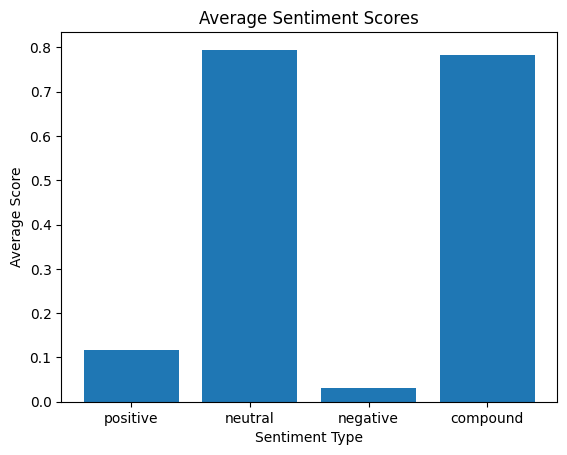

In [15]:
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Assuming you have a DataFrame 'df' with a column named 'Content' containing news article comments

average_scores = {
    'positive': 0,
    'neutral': 0,
    'negative': 0,
    'compound': 0
}

total_articles = len(df)

for content in df['Content']:
    sentiment_scores = analyze_sentiment(content)

    average_scores['positive'] += sentiment_scores['pos']
    average_scores['neutral'] += sentiment_scores['neu']
    average_scores['negative'] += sentiment_scores['neg']
    average_scores['compound'] += sentiment_scores['compound']

# Calculate average scores
for score_type in average_scores:
    average_scores[score_type] /= total_articles

# Create a bar graph
sentiment_types = list(average_scores.keys())
scores = list(average_scores.values())

plt.bar(sentiment_types, scores)
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment Type')
plt.ylabel('Average Score')
plt.show()
